# Discussion Week 4 Activity: Find the secret parameters



In [22]:
import numpy as np
import matplotlib.pyplot as py


## Let's create a simulation where we know the true parameters

In [49]:
np.random.seed(1)

# How many points should we use?
n = 15

# What mean and standard deviation to use for the noise?
mu = 0
sd = 2

# Select n points from the uniform distribution between -10 and 10
x = np.random.uniform(-10, 10, n)

# Select two parameters from the uniform distribution between -5 and 5 to be our
# y-intercept and slope
m_true = np.random.uniform(-5, 5, 2)

# Make some noise
#noise = np.random.normal(mu, sd, n)
noise = np.random.gumbel(mu, sd, n)

# Generate simulated data points
y = m_true[0] + m_true[1]*x + noise

In [50]:
#help(np.random.uniform)

Plotting our mystery function

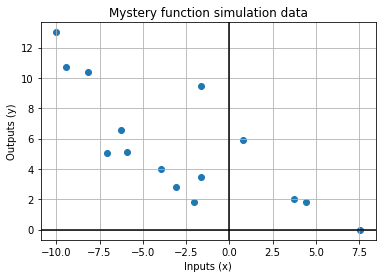

In [51]:
ax = py.axes();
ax.scatter(x, y);
ax.grid(which='both');
ax.axhline(y=0, color='k');
ax.axvline(x=0, color='k');
ax.set_xlabel('Inputs (x)')
ax.set_ylabel('Outputs (y)')
ax.set_title('Mystery function simulation data');

## Question 1: 

Looking at the graph, write a guess for the parameters if we model this data using the equation $y = a + bx$. What do you estimate for the y-intercept (or offset), $a$, and what do you expect to find for the slope, $b$?

Write your estimates here:

    a = 1.5
    b = -2/2.5
    

Notice that our parameters $a$ and $b$ must satisfy the following set of equations: (as close as possible...)

$$
\begin{align} 
a + b\cdot x_1 &= y_1 \\
a + b\cdot x_2 &= y_2 \\
a + b\cdot x_3 &= y_3 \\
a + b\cdot x_4 &= y_4 \\
\vdots \\
a + b\cdot x_n &= y_n 
\end{align}
$$



We can multiply all the $a$-values by 1 to obtain the following:
    
$$
\begin{align} 
a\cdot (1) + b\cdot x_1 &= y_1 \\
a\cdot(1) + b\cdot x_2 &= y_2 \\
a\cdot(1) + b\cdot x_3 &= y_3 \\
a\cdot(1) + b\cdot x_4 &= y_4 \\
\vdots \\
a\cdot(1) + b\cdot x_n &= y_n \\
\end{align}
$$

Equivalently, we can write
$$
\begin{pmatrix} 
1 \\
1 \\
1 \\
1 \\
\vdots \\
1 \\
\end{pmatrix} \begin{pmatrix}
a
\end{pmatrix} + \begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\vdots \\
x_n \\
\end{pmatrix} \begin{pmatrix}
b
\end{pmatrix}=\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
\vdots \\
y_n \\
\end{pmatrix}
$$

or, equivalently,

$$
\begin{pmatrix} 
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
1 & x_4 \\
1 & \vdots \\
1 & x_n \\
\end{pmatrix} \begin{pmatrix}
a \\
b \\
\end{pmatrix}=\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
\vdots \\
y_n \\
\end{pmatrix}
$$

One way to label the parts of this equation would be
$$\textbf{A}\vec{m} = \vec{y}$$

where $\textbf{A}$ is a matrix with a column of ones (for the y-intercept) and your input data, $\vec{m}$ is your vector of model parameters, and $\vec{y}$ is your vector of target data.

To solve the equation $\textbf{A}\vec{m} = \vec{y}$, we need to isolate our model parameters, $\vec{m}$. If we could take the inverse of $\textbf{A}$ and apply it to both sides of our equation, we could solve for $\vec{m}$. $\textbf{However, matrices that are not square are not invertible.}$

To have an inverse, a matrix must be square with linearly independent columns. We can multiply $\textbf{A}$ by its transpose to create a square matrix (though it will not have an inverse if the columns are not linearly independent). We just need to apply $\textbf{A}$ transpose ($\textbf{A}^{T}$) to both sides of our equation.

$$\textbf{A}^{T}\textbf{A}\vec{m} = \textbf{A}^{T}\vec{y}$$

In [52]:
# Let's see what that looks like!
ones = np.ones(len(x))
A = np.vstack([ones, x]).T
print("Here is our matrix A: \n", A)

Here is our matrix A: 
 [[ 1.         -1.65955991]
 [ 1.          4.40648987]
 [ 1.         -9.9977125 ]
 [ 1.         -3.95334855]
 [ 1.         -7.06488218]
 [ 1.         -8.1532281 ]
 [ 1.         -6.27479577]
 [ 1.         -3.08878546]
 [ 1.         -2.06465052]
 [ 1.          0.77633468]
 [ 1.         -1.61610971]
 [ 1.          3.70439001]
 [ 1.         -5.91095501]
 [ 1.          7.56234873]
 [ 1.         -9.45224814]]


To obtain the tranpose of $\textbf{A}$, we swap each row and column element. In other words $\textbf{A}^T[i,j] = \textbf{A}[j,i]$ where the first index is the row and the second index is the column.

In [53]:
print("The transpose of A is given by \n", A.T)

The transpose of A is given by 
 [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [-1.65955991  4.40648987 -9.9977125  -3.95334855 -7.06488218 -8.1532281
  -6.27479577 -3.08878546 -2.06465052  0.77633468 -1.61610971  3.70439001
  -5.91095501  7.56234873 -9.45224814]]


## Question 2
Note that $\textbf{A}^T$ has dimensions $2 \times n$, and $\textbf{A}$ has dimensions $n \times 2$. What will the dimensions of $\textbf{A}^{T}\textbf{A}$ be?

Question 2 Solution:

2 x 2



In [54]:
AtA = np.matmul(A.T, A)
print("The square matrix we get from AtA is given by: \n", AtA)

The square matrix we get from AtA is given by: 
 [[ 15.         -42.78671256]
 [-42.78671256 505.72915388]]


Notice that $\textbf{A}^{T}\textbf{A}$ is symmetric about the diagonal. That is, $\textbf{A}[i,j] = \textbf{A}[j,i]$ for every index $i$ and $j$.

If no scalar multiple of column 1 is equal to column 2, then the columns of this matrix are also $\textbf{linearly independent}$. 

## Question 3

To recap, our matrix $\textbf{A}^{T}\textbf{A}$ needs to be $\textbf{square}$ and have columns that are $\textbf{linearly independent}$ to be invertible to solve for $\vec{m}$. Will $\textbf{A}^{T}\textbf{A}$ always be square with linearly independent columns? Explain. (Feel free to do an internet search, and please cite your source.)

Question 3 Solution:


Let's suppose that the columns of A are linearly independent. Then the columns of A-transpose times A are linearly independent (see Khan Academy video). We also have that AtA is square, and therefore it's invertible.

However, we'll run into issues if our matrix A has all the same numbers in column 2, e.g.,

$$\textbf{A} = 
\begin{pmatrix} 
1 & 2 \\
1 & 2 \\
1 & 2 \\
\end{pmatrix}
$$.

This will create the following AtA matrix:

$$
\begin{pmatrix} 
3 & 6 \\
6 & 12
\end{pmatrix}
$$

Note that the second column is the first column times 2. That is not linearly independent.

In summary, AtA will not always be invertible. If one column of A is a multiple of the the other column of A, the same will be true for AtA.


Source: Sal Khan of Khan Academy

Video: Showing that A-transpose x A is invertible
https://www.khanacademy.org/math/linear-algebra/matrix-transformations/matrix-transpose/v/lin-alg-showing-that-a-transpose-x-a-is-invertible



In [55]:
a = np.array([[1, 2],
             [1,2],
             [1,2]])
print(a)

print(np.matmul(a.T, a))

[[1 2]
 [1 2]
 [1 2]]
[[ 3  6]
 [ 6 12]]


Now, we are close to isolating our parameters $\vec{m}$. If we can find an inverse for $\textbf{A}^{T}\textbf{A}$, then we can find a least squares solution for $\vec{m}$. In other words,

$$\begin{align}
\textbf{A}^{T}\textbf{A}\vec{m} &= \textbf{A}^{T}\vec{y} \\
\implies (\textbf{A}^{T}\textbf{A})^{-1}\textbf{A}^{T}\textbf{A}\vec{m} &= (\textbf{A}^{T}\textbf{A})^{-1}\textbf{A}^{T}\vec{y} \\
\implies \textbf{I}\vec{m} &= (\textbf{A}^{T}\textbf{A})^{-1}\textbf{A}^{T}\vec{y} \text{    where $\textbf{I}$ is the identity function} \\
\implies \vec{m} &= (\textbf{A}^{T}\textbf{A})^{-1}\textbf{A}^{T}\vec{y}
\end{align}
$$

Please uncomment the code below

In [56]:
# Matrix multiplication has the associative property. Therefore, we can group the
# terms together to multiply them 

AtA_inv = np.linalg.inv(AtA)
Aty = np.matmul(A.T, y)

# The estimated parameters are given by the following:
m = np.matmul(AtA_inv, Aty)

Please uncomment the code below

In [57]:
print('Our least squares parameter estimates are \n', m)
print('\n')
print('The true parameters are given by \n', m_true)
print('\n')

Our least squares parameter estimates are 
 [ 3.85439266 -0.56884698]


The true parameters are given by 
 [ 1.7046751  -0.82695198]




## Question 3

How does our solution for the parameters compare to the one given by numpy? Hint: you can use $\textbf{help(np.linalg.lstsq)}$ to see what key word arguments are needed to get the least squares solution from the linear algebra tools.

In [58]:
m_np = np.linalg.lstsq(A, y, rcond = None)[0]
print(m_np)






[ 3.85439266 -0.56884698]


In [59]:
#help(np.linalg.lstsq)

## Question 4

How does the number of points affect how close the estimated parameters are to the true parameters? Please go back to the top of the program and change the number of points to a large value (greater than or equal to 15) and a small value. What do you notice?

## Enrichment section

This section discusses
* changing your cost function to address skew in the noise and 
* how to speed up your programs by using matrix multiplication instead of for-loops.

In [42]:
import time

The time module is helpful for planning out how much time a program will take to run and optimizing your code. You might need to install this from Anaconda or from the terminal (MacOS) or console (Windows) using

$\textbf{conda install time}$

## Question 5 
Our simulated data shows a relationship with Gaussian (or normally-distributed noise). What happens if the noise is skewed? Try setting 

noise = np.random.gumbel(mu, sd, n)

What happens to the solution? 

In [43]:
#help(np.random)

In [44]:
N = 10000
x1 = np.random.normal(0, 1, N)
x2 = np.random.gumbel(0, 1, N)

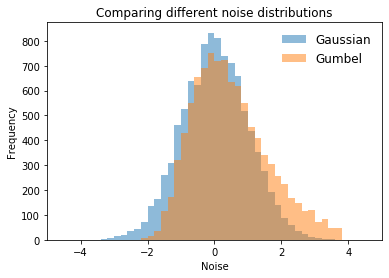

In [45]:
ax = py.axes()
bins = np.arange(-4, 4, 0.2)
myfontsize = 12
ax.hist(x = x1, bins = bins, alpha = 0.5, label = 'Gaussian');
ax.hist(x = x2, bins = bins, alpha = 0.5, label = 'Gumbel');
ax.set_title("Comparing different noise distributions")
ax.set_xlabel("Noise")
ax.set_ylabel("Frequency")
ax.set_xlim(-5, 5)
ax.legend(frameon = False, fontsize = myfontsize);


## Guiding question for this section
* How might we fix bias in our model when working with skewed data?

When we are using a least squares solution, what equation are we optimizing? Take a look at the documentation for this function to find out:

In [ ]:
#help(np.linalg.lstsq)

Minimizing the sum of the squares is not the only way to find an optimal solution. If you have outliers, the squared error for those outlying values will be very large. Therefore, your solution will pull the linear fit towards them to minimize the square of their errors.

Instead of minimizing the equation 
$$ J(m) = \Sigma_{i=1}^{n}(\hat{y}_i - {y}_i)^2, $$
we can minimize
$$ J(m) = \Sigma_{i=1}^{n}|\hat{y}_i - {y}_i|.$$

In [84]:
start = time.time()

m1 = np.linspace(-5, 5, 1000)
m2 = np.linspace(-5, 5, 1000)

# Initialize a two-dimensional matrix (one dimension per parameter)
cost = np.zeros((len(m1), len(m2)))

# Reassign the zeros to NaNs so that you don't accidentally end up
# with a zero if there is a mistake in the code
cost[:,:] = np.nan

for i in np.arange(len(m1)):
    for j in np.arange(len(m2)):
        y_hat = m1[i] + m2[j]*x
        cost[i,j] = sum(abs(y_hat - y))

idx_m1, idx_m2 = np.where(cost==cost.min())

print('The minimum cost for parameters \n', m1[idx_m1], m2[idx_m2])

print('The true parameters are \n', m_true)
        
end = time.time()

print("Time in seconds for this process:", end - start)

The minimum cost for parameters 
 [3.58858859] [-0.47547548]
The true parameters are 
 [ 1.7046751  -0.82695198]
Time in seconds for this process: 5.774454832077026


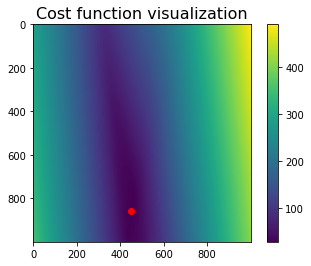

In [85]:
# Let's plot it using Jim's cost function code from Monday
myfontsize = 14
fig = py.figure()
ax = py.axes()
im = ax.imshow(cost)
ax.plot(idx_m2, idx_m1, "o", color = "red")
fig.colorbar(im, ax = ax)
ax.set_title("Cost function visualization", fontsize = myfontsize + 2);

## Using matrices instead of for-loops

We can use the idea that if we multiply $\textbf{A}$ by our parameter estimate $\hat{m}$, we obtain our target estimate $\hat{y}$. That is, 

$$\textbf{A}\hat{m} = \hat{y}.$$ 

If we want to test many parameter estimates $\hat{m_1}, ..., \hat{m_k}$, we can multiply $\textbf{A}$ by the following:
$$\textbf{A}\begin{bmatrix}\hat{m_1}, \hat{m_2}, ..., \hat{m_k} \end{bmatrix}$$
where $\begin{bmatrix}\hat{m_1}, \hat{m_2}, ..., \hat{m_k}\end{bmatrix}$ is a matrix with each set of parameters as each of the columns. Then, we have

$$
\begin{align}
\textbf{A}
\begin{bmatrix}\hat{m_1}, \hat{m_2}, ..., \hat{m_k} \end{bmatrix} &= 
\begin{bmatrix}\textbf{A}\hat{m_1}, \textbf{A}\hat{m_2}, ..., \textbf{A}\hat{m_k}\end{bmatrix} \\
&= \begin{bmatrix}\hat{y_1}, \hat{y_2}, ..., \hat{y_k} \end{bmatrix}
\end{align}
$$

In this equation, each column $\hat{y_i}$ of the resulting matrix is an estimate for the data values. We can use these to see which one is best. That is if we take the square of each element in $\hat{y_i}$ and sum them up, we will have the sum of the squares. The column with the smallest sum of the squares will be the least squares solution.

In [86]:
# Start timing our method
start = time.time()

# Create a meshgrid of our data (see help(np.meshgrid))
M1, M2 = np.meshgrid(m1, m2)

# Reshape our meshgrid matrices into long vectors to match up every pair of parameters in our grid search
M = np.vstack((np.reshape(M1, -1), np.reshape(M2, -1)))
print(M.shape)

# Matrix multiply our matrix A with our matrix M which stores a pair of parameters to test in every column
Y_hat = np.matmul(A, M)

# The resulting matrix has predictions for y corresponding to every pair of parameters we tested
print(Y_hat.shape)

# Make a matrix where each column is the target vector (repeated for every column)

# First, let's make our size (n,) array into a size (n, 1) matrix (column vector)
y_vec = np.array([y]).T
print(y_vec.shape)

# Then, repeat the column vector over and over again to have as many columns as Y_hat (so we can subtract them)
Y = np.repeat(y_vec, M.shape[1], axis = 1)

# Compute the residuals
resid = Y_hat - Y

# Method 1: minimize the sum of the absolute value of the residuals
abs_vals = np.sum(np.abs(resid), 0)
idx1 = np.argmin(abs_vals)

# Print our results
print("The L1 solution (from minimizing the sum of the absolute values of the residuals) is given by \n", M[:,idx1])
print("\n")

# Method 2: minimize the sum of the squares of the residuals (least squares)
squares = np.sum(resid**2, 0)
idx2 = np.argmin(squares)

# Print our results
print("The L2 solution (from minimizing the sum of the squares of the residuals) is given by \n", M[:,idx2])
print("\n")

# Compare to the true parameters
print("The true parameters were \n", m_true)
print("\n")

end = time.time()
# Print the time
print("Time in seconds for this process:", end - start)

(2, 1000000)
(15, 1000000)
(15, 1)
The L1 solution (from minimizing the sum of the absolute values of the residuals) is given by 
 [ 3.58858859 -0.47547548]


The L2 solution (from minimizing the sum of the squares of the residuals) is given by 
 [ 3.85885886 -0.56556557]


The true parameters were 
 [ 1.7046751  -0.82695198]


Time in seconds for this process: 1.7848541736602783


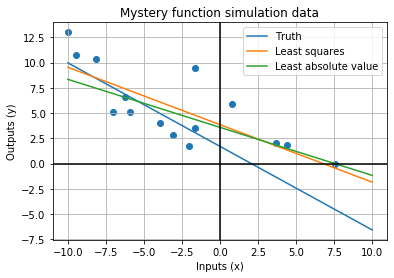

In [87]:
# Create a linear space for plotting
xx = np.linspace(-10, 10, 1000)

# Truth
yy_true = m_true[0] + m_true[1]*xx

# Least squares solution
yy_lstsq = m_np[0] + m_np[1]*xx

# Least absolute value solution
m_abs = M[:,idx1]
yy_abs = m_abs[0] + m_abs[1]*xx

# Plot
ax = py.axes();
ax.scatter(x, y);
ax.plot(xx, yy_true, label = "Truth")
ax.plot(xx, yy_lstsq, label = "Least squares")
ax.plot(xx, yy_abs, label = "Least absolute value")
ax.grid(which='both');
ax.axhline(y=0, color='k');
ax.axvline(x=0, color='k');
ax.set_xlabel('Inputs (x)')
ax.set_ylabel('Outputs (y)')
ax.legend()
ax.set_title('Mystery function simulation data');

## Question 6
How does the time compare between the for-loop method and the matrix method?



Question 6 response:
    
    
    
    
    

## Question 7

* How might you further improve your parameter search without fully searching the grid?

Question 7 response here:

You might do a search with a large step at first and then make your step size smaller as your get




## Question 8
* How might we fix bias in our model when working with skewed data?

Summary: 





